# 3. EDA: Analisis exploratorio de casos

In [1]:
# manipulacion de archivos
import os

# transformacion de datos
import numpy as np
import pandas as pd
from itertools import chain

# graficos compatible con dash
import plotly.express as px

## 3.1. ¿Cuál es la heterogeneidad tecnologica al interior de grupos?

En esta seccion, exploramos las caracteristicas tecnologicas de los dos grupos de interes con el fin de entender un poco sobre su contexto tecnologico. Consideramos que ganar claridad sobre la heterogeneidad tecnologica al interior de grupos nos ayudará a entender la distribucion de la volatilidad al interior de cada grupo. 

In [2]:
data_market = pd.read_pickle(os.path.join('1_data','data_market.pkl'))
data_market.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34099 entries, 2072 to 56288
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   coin_id        34099 non-null  object 
 1   prices         34099 non-null  float64
 2   year           34099 non-null  int32  
 3   month          34099 non-null  int32  
 4   day            34099 non-null  int32  
 5   market_caps    34099 non-null  float64
 6   total_volumes  34099 non-null  float64
 7   category_id    34099 non-null  object 
 8   categories     34099 non-null  object 
dtypes: float64(3), int32(3), object(3)
memory usage: 2.2+ MB


In [3]:
# definir grupos
obs_all = data_market.groupby(['category_id','coin_id','year'])
  
# count observaciones
obs_all = obs_all.size()
  
# observaciones
obs_all=obs_all.reset_index(name='observaciones')
obs_all.to_csv(os.path.join("3_output","obs_all.csv"),index=False)
obs_all

,category_id,coin_id,year,observaciones
0,layer-1,algorand,2019,194
1,layer-1,algorand,2020,366
2,layer-1,algorand,2021,365
3,layer-1,algorand,2022,365
4,layer-1,algorand,2023,244
...,...,...,...,...
100,stablecoins,usd-coin,2019,365
101,stablecoins,usd-coin,2020,366
102,stablecoins,usd-coin,2021,365
103,stablecoins,usd-coin,2022,365


In [31]:
# definir grupos
obs_coin_id = data_market.groupby(['category_id','coin_id'])
  
# count observaciones
obs_coin_id = obs_coin_id.size()
  
# observaciones
obs_coin_id=obs_coin_id.reset_index(name='observaciones')
obs_coin_id.to_csv(os.path.join("3_output","obs_coin_id.csv"),index=False)
obs_coin_id

,category_id,coin_id,observaciones
0,layer-1,algorand,1534
1,layer-1,binancecoin,1705
2,layer-1,bitcoin,1705
3,layer-1,bitcoin-cash,1705
4,layer-1,cardano,1705
5,layer-1,cosmos,1651
6,layer-1,crypto-com-chain,1704
7,layer-1,ethereum,1705
8,layer-1,fantom,1705
9,layer-1,hedera-hashgraph,1445


In [5]:
# definir grupos
obs_year = data_market.groupby(['category_id','year'])
  
# count observaciones
obs_year = obs_year.size()
  
# observaciones
obs_year=obs_year.reset_index(name='observaciones')
obs_year.to_csv(os.path.join("3_output","obs_year.csv"),index=False)
obs_year

,category_id,year,observaciones
0,layer-1,2019,3529
1,layer-1,2020,4026
2,layer-1,2021,4015
3,layer-1,2022,4015
4,layer-1,2023,2684
5,stablecoins,2019,2448
6,stablecoins,2020,3642
7,stablecoins,2021,3650
8,stablecoins,2022,3650
9,stablecoins,2023,2440


### 3.1.1. Caracteristicas tecnologicas del grupo 'layer-1'

In [6]:
# nos concentramos unicamente en el grupo 'layer-1'
data_coins_info_layer1 = data_market.loc[
    data_market['category_id'].str.contains('layer-1')][
        ['category_id','coin_id','categories']].drop_duplicates(subset=['coin_id'])

# calculamos la frecuencia de cada una de las etiquetas listadas
# cada etiqueta corresponde a una caracteristica tecnologica
categories_freq_layer1=pd.DataFrame(
    pd.Series(list(chain.from_iterable(
        data_coins_info_layer1['categories'].dropna())))
    .value_counts()).reset_index().rename(columns={'index':'category'})

# nuevamente, las caracteristicas no son excluyentes,
# asi que una criptomoneda puede evidenciar multiples caracteristicas
# por esta razon, expresamos la frecuencia de cada caracteristica
# como porcentaje del total de casos del grupo;
# naturalmente, todos los casos del grupo Layer 1 (L1) son Layer 1 (L1);
# dejamos esta fila como confirmacion de la consistencia
# en la conformacion de grupos
categories_freq_layer1['count_shr']=round(
    (categories_freq_layer1[
        'count']/data_coins_info_layer1['coin_id'].nunique())*100,2)
categories_freq_layer1['category_id']=data_coins_info_layer1['category_id'].unique()[0]
# resultados
categories_freq_layer1.head(20)

,category,count,count_shr,category_id
0,Layer 1 (L1),11,100.00,layer-1
1,Smart Contract Platform,8,72.73,layer-1
2,Ethereum Ecosystem,4,36.36,layer-1
3,Alleged SEC Securities,4,36.36,layer-1
4,Cryptocurrency,3,27.27,layer-1
5,BNB Chain Ecosystem,3,27.27,layer-1
6,Harmony Ecosystem,2,18.18,layer-1
7,Exchange-based Tokens,2,18.18,layer-1
8,Centralized Exchange (CEX),2,18.18,layer-1
9,Moonriver Ecosystem,2,18.18,layer-1


Con base en lo anterior, observamos que el 72% de nuestro subconjunto de casos estan conformadas por casos con caracteristicas de `Smart Contract Platform`; esta tecnologia ser refiere a criptomoneda que incoporan en su algoritmo las condiciones contractuales de la transaccion, haciendo posible su realizacion automatica en caso que una de las condiciones se cumpla. De igual manera, el 36% son casos de `Alleged SEC Securities`; esta categoria corresponde a criptomonedas que estan vinculadas al valor de la organizacion que las genera según un fallo de la U.S. Securities and Exchange Commission (SEC). Adicionalmente, por lo menos 4 casos pertenecen a un ecosistema de criptomonedas.

### 3.1.2. Caracteristicas tecnologicas del grupo 'stablecoins'

In [7]:
# nos concentramos unicamente en el grupo 'stablecoins'
data_coins_info_stable = data_market.loc[
    data_market['category_id'].str.contains('stablecoins')][
        ['category_id','coin_id','categories']].drop_duplicates(subset=['coin_id'])

# calculamos la frecuencia de cada una de las etiquetas listadas
# cada etiqueta corresponde a una caracteristica tecnologica
categories_freq_stable=pd.DataFrame(
    pd.Series(list(chain.from_iterable(
        data_coins_info_stable['categories'].dropna())))
    .value_counts()).reset_index().rename(columns={'index':'category'})

# expresamos la frecuencia de cada caracteristica
# como porcentaje del total de casos del grupo;
# naturalmente, todos los casos del grupo stablecoins son stablecoins
categories_freq_stable['count_shr']=round(
    (categories_freq_stable[
        'count']/data_coins_info_stable['coin_id'].nunique())*100,2)
categories_freq_stable['category_id']=data_coins_info_stable['category_id'].unique()[0]

# resultados
categories_freq_stable.head(20)

,category,count,count_shr,category_id
0,Ethereum Ecosystem,10,100.0,stablecoins
1,Stablecoins,10,100.0,stablecoins
2,USD Stablecoin,7,70.0,stablecoins
3,Polygon Ecosystem,7,70.0,stablecoins
4,Harmony Ecosystem,6,60.0,stablecoins
5,Fantom Ecosystem,5,50.0,stablecoins
6,BNB Chain Ecosystem,5,50.0,stablecoins
7,Avalanche Ecosystem,5,50.0,stablecoins
8,Velas Ecosystem,4,40.0,stablecoins
9,Moonbeam Ecosystem,4,40.0,stablecoins


A diferencia del grupo anterior (`Layer 1 (L1)`), la tabla de arriba sugiere que la enorme mayoria de los casos pertenece a algun ecosistema te criptomonedas. Observamos que el 100% de nuestro grupo `stablecoins` puede integrarse con el ecosistema `Ethereum Ecosystem`, seguido por el 70% de los casos que hacen parte tanto de algunos de los ecosistemas `USD Stablecoin` o `Polygon Ecosystem`.

Como mencionamos anteriormente, la membresia a un ecosistema particular no es excluyente de su membresia a otro. Esto sugiere que los casos de nuestro grupo `stablecoins` parecen ser relativamente flexbibles en terminos tecnologicos; es decir, son criptomonedas con una flexbilidad tecnologica suficiente que pueden empleadas en una amplia variedad de ecosistemas.

### 3.1.3. Exportamos dfs

In [8]:
categories_freq_all=pd.concat(
    [categories_freq_layer1,categories_freq_stable])
categories_freq_all.to_csv(
    os.path.join("3_output","categories_freq_all.csv"),index=False)
categories_freq_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 0 to 33
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category     55 non-null     object 
 1   count        55 non-null     int64  
 2   count_shr    55 non-null     float64
 3   category_id  55 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.1+ KB


## 3.2. Distribucion de "Volatilidad relativa"

### 3.2.1. Volatilidad relativa: precios corrientes

In [9]:
data_market_prcvoltlty_crrnt = pd.read_pickle(
    os.path.join('2_pipeline','data_market_prcvoltlty_crrnt.pkl'))
data_market_prcvoltlty_crrnt.to_csv(
    os.path.join("3_output","data_market_prcvoltlty_crrnt.csv"),index=False)
data_market_prcvoltlty_crrnt.info()
data_market_prcvoltlty_crrnt.head()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 10 to 64
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category_id    105 non-null    object 
 1   coin_id        105 non-null    object 
 2   year           105 non-null    int32  
 3   sd_coin        105 non-null    float64
 4   sd_group_mean  105 non-null    float64
 5   vltlty_ratio   105 non-null    float64
 6   vltlty_rank    105 non-null    float64
dtypes: float64(4), int32(1), object(2)
memory usage: 6.2+ KB


,category_id,coin_id,year,sd_coin,sd_group_mean,vltlty_ratio,vltlty_rank
10,layer-1,bitcoin,2019,2655.712480,255.73451,10.384646,1.0
15,layer-1,bitcoin-cash,2019,96.242064,255.73451,0.376336,2.0
35,layer-1,ethereum,2019,50.775028,255.73451,0.198546,3.0
5,layer-1,binancecoin,2019,8.374184,255.73451,0.032746,4.0
25,layer-1,cosmos,2019,1.132393,255.73451,0.004428,5.0


In [10]:
# definir grupos
obs_prcvoltlty_crrnt = data_market_prcvoltlty_crrnt.groupby(
    ['category_id','year'])
  
# count observaciones
obs_prcvoltlty_crrnt = obs_prcvoltlty_crrnt.size()
  
# observaciones
obs_prcvoltlty_crrnt=obs_prcvoltlty_crrnt.reset_index(name='observaciones')
obs_year.to_csv(
    os.path.join("3_output","obs_prcvoltlty_crrnt.csv"),index=False)
obs_prcvoltlty_crrnt

,category_id,year,observaciones
0,layer-1,2019,11
1,layer-1,2020,11
2,layer-1,2021,11
3,layer-1,2022,11
4,layer-1,2023,11
5,stablecoins,2019,10
6,stablecoins,2020,10
7,stablecoins,2021,10
8,stablecoins,2022,10
9,stablecoins,2023,10


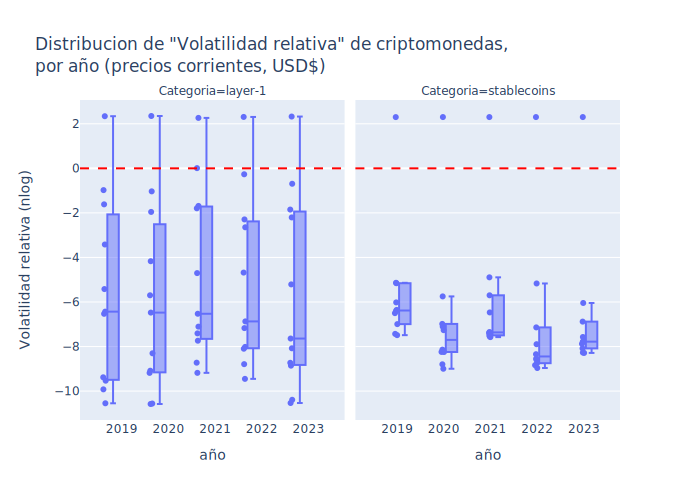

In [11]:
# transformos los datos a su log natural para facilitar su visualizacion
data_market_prcvoltlty_crrnt.loc[:,'vltlty_ratio_log'] = np.log(
    data_market_prcvoltlty_crrnt['vltlty_ratio'])

# Boxplot
boxplot_crrnt = px.box(
    data_market_prcvoltlty_crrnt
    ,
    x='year',
    y='vltlty_ratio_log',
    points='all',
    facet_col='category_id',
    facet_col_wrap=2,
    labels={
        'year': 'año',
        'vltlty_ratio_log': 'Volatilidad relativa (nlog)',
        'category_id': 'Categoria'},
    title='Distribucion de "Volatilidad relativa" de criptomonedas,<br>por año (precios corrientes, USD$)')
 
boxplot_crrnt.add_hline(
    y=np.log(1),
    line_width=2,
    line_dash='dash',
    line_color='red')
boxplot_crrnt.update_xaxes(type='category')
boxplot_crrnt.show('svg')

El grafico muestra la distribucion de la volatilidad relativa de criptomonedas por año. La linea roja representa el promedio anual de volatilidad relativa; como construimos nuestro KPI de "Volatilidad relativa" en relacion al promedio, este es equivalente al valor 1 (el cual expresamo en el grafico a traves de su log natural que es igual a 0). Con base en este grafico, podemos observar que las monedas de la categoria `layer-1` posee unos niveles mas altos de variacion con respecto a su volatilidad relativa por año, en comparacion al grupo `stablecoins`. No observamos ningun año paritcularmente mas volatil que otro en ninguno de los dos grupos. Sin embargo, observamos en ambos grupos que los valores extremos jalonan el promedio hacia arriba (linea roja), dejando la gran mayoria de los casos por debajo; es decir, con una volatilidad relativa < 1 al promedio de todas las criptomonedas en el mismo año.

### 3.2.2. "Volatilidad relativa" segun contexto local

In [12]:
data_market_prcvoltlty_constant = pd.read_pickle(
    os.path.join('2_pipeline','data_market_prcvoltlty_constant.pkl'))
data_market_prcvoltlty_constant.info()
data_market_prcvoltlty_constant.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   category_id           420 non-null    object 
 1   code_pais             420 non-null    object 
 2   coin_id               420 non-null    object 
 3   year                  420 non-null    int32  
 4   sd_pais_coin          420 non-null    float64
 5   sd_group_pais_mean    420 non-null    float64
 6   sd_group_pais_median  420 non-null    float64
dtypes: float64(3), int32(1), object(3)
memory usage: 21.5+ KB


,category_id,code_pais,coin_id,year,sd_pais_coin,sd_group_pais_mean,sd_group_pais_median
0,layer-1,ARG,algorand,2019,0.765119,475.884650,0.765119
1,layer-1,ARG,algorand,2020,0.193741,782.470174,1.204551
2,layer-1,ARG,algorand,2021,0.758258,1739.810852,2.542353
3,layer-1,ARG,algorand,2022,0.463004,1403.234830,1.455064
4,layer-1,ARG,binancecoin,2019,15.583135,475.884650,0.765119


In [13]:
# unimos
data_prcvoltlty_constant_sd_group_pais=data_market_prcvoltlty_constant[
    ['category_id','code_pais','sd_group_pais_mean','sd_group_pais_median']
    ].copy().drop_duplicates()
data_prcvoltlty_constant_sd_group_pais.to_csv(
    os.path.join(
        "3_output","data_market_prcvoltlty_constant_sd_group_pais.csv"))
obs_prcvoltlty_constant_cntrs=data_prcvoltlty_constant_sd_group_pais.groupby(
    ['category_id','code_pais'])
  
# contamos obervaciones
obs_prcvoltlty_constant_cntrs = obs_prcvoltlty_constant_cntrs.size()
  
# observamos
obs_prcvoltlty_constant_cntrs=obs_prcvoltlty_constant_cntrs.reset_index(
    name='observaciones')
obs_prcvoltlty_constant_cntrs.to_csv(
    os.path.join("3_output","obs_prcvoltlty_constant_cntrs.csv"))
obs_prcvoltlty_constant_cntrs

,category_id,code_pais,observaciones
0,layer-1,ARG,4
1,layer-1,BRA,4
2,layer-1,COL,4
3,layer-1,MEX,4
4,layer-1,USA,4
5,stablecoins,ARG,4
6,stablecoins,BRA,4
7,stablecoins,COL,4
8,stablecoins,MEX,4
9,stablecoins,USA,4


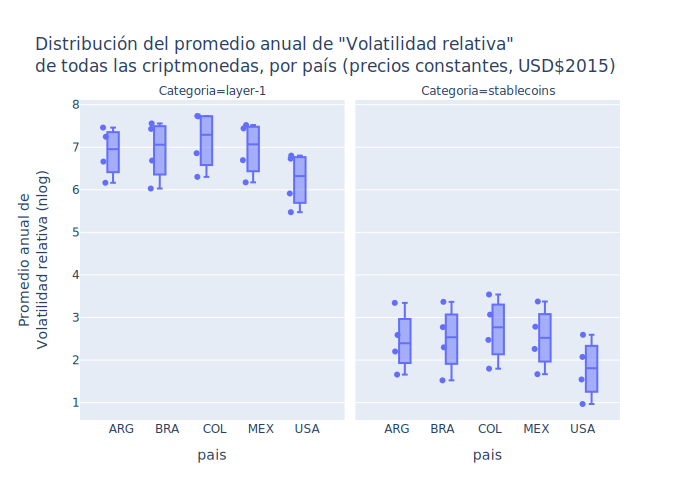

In [14]:
# transformos los datos a su log natural para facilitar su visualizacion
data_prcvoltlty_constant_sd_group_pais.loc[
    :,'sd_group_pais_mean_log'] = np.log(
        data_prcvoltlty_constant_sd_group_pais['sd_group_pais_mean'])

# Boxplot
boxplot_constant = px.box(
    data_prcvoltlty_constant_sd_group_pais,
    x='code_pais',
    y='sd_group_pais_mean_log',
    points='all',
    facet_col='category_id',
    facet_col_wrap=2,
    labels={
        'code_pais': 'pais',
        'sd_group_pais_mean_log':
            'Promedio anual de<br>Volatilidad relativa (nlog)',
        'category_id': 'Categoria'},
    title='Distribución del promedio anual de "Volatilidad relativa"<br>de todas las criptmonedas, por país (precios constantes, USD$2015)')
boxplot_constant.update_xaxes(type='category')
boxplot_constant.show('svg')

El grafico muestra la distribucion del promedio anual de la volatilidad relativa de criptomonedas por pais. Podemos observar que en los paises latinoamericano el comportamiento de la volatilidad es mas alto en comparacion con EEUU, en ambos grupos de monedas. Esto sugiere que el contexto local influyen en la intensidad de la volatilidad de las criptomonedas.

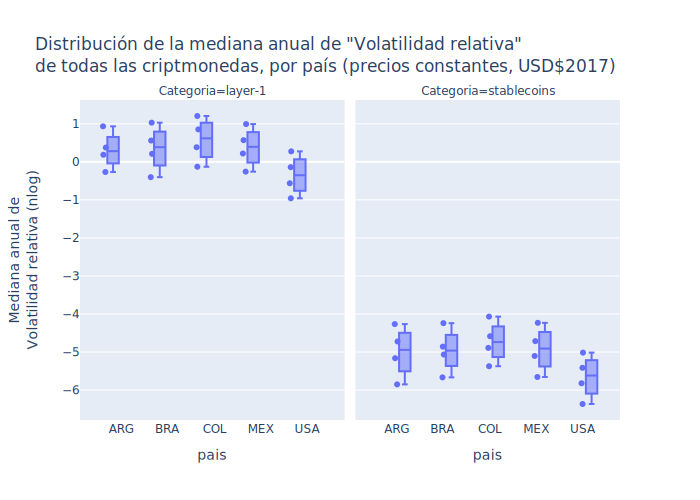

In [15]:
# transformos los datos a su log natural para facilitar su visualizacion
data_prcvoltlty_constant_sd_group_pais.loc[
    :,'sd_group_pais_median_log'] = np.log(
    data_prcvoltlty_constant_sd_group_pais['sd_group_pais_median'])

# Boxplot
boxplot_constant = px.box(
    data_prcvoltlty_constant_sd_group_pais,
    x='code_pais',
    y='sd_group_pais_median_log',
    points='all',
    facet_col='category_id',
    facet_col_wrap=2,
    labels={
        'code_pais': 'pais',
        'sd_group_pais_median_log':
            'Mediana anual de<br>Volatilidad relativa (nlog)',
        'category_id': 'Categoria'},
    title='Distribución de la mediana anual de "Volatilidad relativa"<br>de todas las criptmonedas, por país (precios constantes, USD$2017)')
boxplot_constant.update_xaxes(type='category')
boxplot_constant.show('svg')

En este grafico nos concentramos en la mediana anual por pais. Observamos los mismos patrones que en el caso del promedio anual.

## 3.3. Las criptomonedas relativamente mas estables: Indice de estabilidad relativa
En esta seccion creamos nuestro indice de estabilidad relativa, segun lo mencionado en la introduccion.

In [16]:
def rescalar(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

data_vltlty_rank = data_market_prcvoltlty_crrnt.loc[:,
    ['category_id','coin_id','year','vltlty_rank']
].copy()
data_vltlty_rank_res=data_vltlty_rank.groupby(
    ['category_id','year'])['vltlty_rank'].apply(rescalar)
data_vltlty_rank_res=data_vltlty_rank_res.reset_index(
    level=['category_id','year']).rename(
        columns={'vltlty_rank':'vltlty_rank_rscld'}).drop(
            columns=['category_id','year'])
data_vltlty_rank=data_vltlty_rank.join(data_vltlty_rank_res)
data_vltlty_rank.head(3)

,category_id,coin_id,year,vltlty_rank,vltlty_rank_rscld
10,layer-1,bitcoin,2019,1.0,0.0
15,layer-1,bitcoin-cash,2019,2.0,0.1
35,layer-1,ethereum,2019,3.0,0.2


In [17]:
# replicamos el proceso anterior para 'total_volumes'
data_volume_rank = data_market.groupby(
    ['category_id','coin_id','year'])[
        'total_volumes'].mean().reset_index().rename(
    columns={'total_volumes':'mean_volumes'})
data_volume_rank['volumes_rank']=data_volume_rank.groupby(
    ['category_id','year'])[
        'mean_volumes'].rank(method='dense', ascending=True)
data_volume_rank_res=data_volume_rank.groupby(
    ['category_id','year'])['volumes_rank'].apply(rescalar)
data_volume_rank_res=data_volume_rank_res.reset_index(
    level=['category_id','year']).rename(
        columns={'volumes_rank':'volumes_rank_rscld'}).drop(
            columns=['category_id','year'])
data_volume_rank=data_volume_rank.join(data_volume_rank_res).drop(columns=['mean_volumes'])
data_volume_rank.head()


,category_id,coin_id,year,volumes_rank,volumes_rank_rscld
0,layer-1,algorand,2019,5.0,0.4
1,layer-1,algorand,2020,4.0,0.3
2,layer-1,algorand,2021,5.0,0.4
3,layer-1,algorand,2022,4.0,0.3
4,layer-1,algorand,2023,4.0,0.3


### 3.3.1. Indice de estabilidad relativa: Por año

In [41]:
# calculamos el indice de estabilidad relativa: cada año
data_stblty_index_year=pd.merge(
    data_vltlty_rank,
    data_volume_rank,
    on=['category_id','coin_id','year'])
data_stblty_index_year['stblty_index']=(
    (data_stblty_index_year['vltlty_rank_rscld']*0.66) +
    (data_stblty_index_year['volumes_rank_rscld']*0.34)
    )
data_stblty_index_year=data_stblty_index_year.rename(columns={
    'vltlty_rank_rscld':'ranking_estabilidad',
    'volumes_rank_rscld':'ranking_volumen',
    'stblty_index':'indice_estabilidad'
    })
data_stblty_index_year.loc[
    :,['ranking_estabilidad','ranking_volumen','indice_estabilidad']]=round(data_stblty_index_year[
        ['ranking_estabilidad','ranking_volumen','indice_estabilidad']]*10,2)
data_stblty_index_year.sort_values(
    ['category_id','indice_estabilidad'],ascending=True)

,category_id,coin_id,year,vltlty_rank,ranking_estabilidad,volumes_rank,ranking_volumen,indice_estabilidad
35,layer-1,bitcoin-cash,2022,3.0,2.00,7.0,6.00,3.36
46,layer-1,bitcoin-cash,2023,3.0,2.00,7.0,6.00,3.36
1,layer-1,bitcoin-cash,2019,2.0,1.00,9.0,8.00,3.38
0,layer-1,bitcoin,2019,1.0,0.00,11.0,10.00,3.40
11,layer-1,bitcoin,2020,1.0,0.00,11.0,10.00,3.40
...,...,...,...,...,...,...,...,...
73,stablecoins,tether,2020,9.0,8.89,10.0,10.00,9.27
103,stablecoins,tether,2023,9.0,8.89,10.0,10.00,9.27
104,stablecoins,binance-usd,2023,10.0,10.00,9.0,8.89,9.62
84,stablecoins,tether,2021,10.0,10.00,10.0,10.00,10.00


In [42]:
# convertimos a formato "largo" para facilitar su uso con herramientas de visualizacion
data_stblty_index_year_pivot=data_stblty_index_year.melt(
    id_vars=['category_id','coin_id','year'],
    value_vars=['ranking_estabilidad','ranking_volumen','indice_estabilidad'])
data_stblty_index_year_pivot.to_csv(
    os.path.join("3_output","data_stblty_index_year.csv"),index=False)
data_stblty_index_year_pivot

,category_id,coin_id,year,variable,value
0,layer-1,bitcoin,2019,ranking_estabilidad,0.00
1,layer-1,bitcoin-cash,2019,ranking_estabilidad,1.00
2,layer-1,ethereum,2019,ranking_estabilidad,2.00
3,layer-1,binancecoin,2019,ranking_estabilidad,3.00
4,layer-1,cosmos,2019,ranking_estabilidad,4.00
...,...,...,...,...,...
310,stablecoins,paxos-standard,2023,indice_estabilidad,4.80
311,stablecoins,dai,2023,indice_estabilidad,6.29
312,stablecoins,true-usd,2023,indice_estabilidad,7.40
313,stablecoins,tether,2023,indice_estabilidad,9.27


### 3.3.2. Indice de estabilidad relativa: Promedio a lo largo del tiempo

In [20]:
# promedio de la posicion a lo largo del tiempo
data_vltlty_rank_index_mean=data_vltlty_rank.groupby(
    ['category_id','coin_id'])['vltlty_rank_rscld'].mean().reset_index()

In [21]:
# promedio de la posicion a lo largo del tiempo
data_volume_rank_index_mean=data_volume_rank.groupby(
    ['category_id','coin_id'])['volumes_rank_rscld'].mean().reset_index()
data_volume_rank_index_mean.head(5)

,category_id,coin_id,volumes_rank_rscld
0,layer-1,algorand,0.34
1,layer-1,binancecoin,0.70
2,layer-1,bitcoin,1.00
3,layer-1,bitcoin-cash,0.72
4,layer-1,cardano,0.68


In [40]:
# calculamos el indice de estabilidad relativa: promedio a lo largo del tiempo
data_stblty_index_mean=pd.merge(
    data_vltlty_rank_index_mean,
    data_volume_rank_index_mean,
    on=['category_id','coin_id'])
data_stblty_index_mean['stblty_index']=(
    (data_stblty_index_mean['vltlty_rank_rscld']*0.66) +
    (data_stblty_index_mean['volumes_rank_rscld']*0.34))
data_stblty_index_mean=data_stblty_index_mean.rename(columns={
    'vltlty_rank_rscld':'ranking_estabilidad',
    'volumes_rank_rscld':'ranking_volumen',
    'stblty_index':'indice_estabilidad'
    })
data_stblty_index_mean.loc[
    :,['ranking_estabilidad','ranking_volumen','indice_estabilidad']]=round(data_stblty_index_mean[
        ['ranking_estabilidad','ranking_volumen','indice_estabilidad']]*10,2)
data_stblty_index_mean.sort_values(
    ['category_id','indice_estabilidad'],ascending=True)

,category_id,coin_id,ranking_estabilidad,ranking_volumen,indice_estabilidad
2,layer-1,bitcoin,0.00,10.00,3.40
3,layer-1,bitcoin-cash,1.80,7.20,3.64
7,layer-1,ethereum,1.20,9.00,3.85
5,layer-1,cosmos,4.00,4.80,4.27
10,layer-1,tezos,5.20,2.60,4.32
1,layer-1,binancecoin,3.00,7.00,4.36
0,layer-1,algorand,6.60,3.40,5.51
8,layer-1,fantom,7.40,2.40,5.70
6,layer-1,crypto-com-chain,8.40,1.20,5.95
9,layer-1,hedera-hashgraph,9.60,0.60,6.54


In [23]:
# convertimos a formato "largo" para facilitar su uso con herramientas de visualizacion
data_stblty_index_mean_pivot=data_stblty_index_mean.melt(
    id_vars=['category_id','coin_id'],
    value_vars=['ranking_estabilidad','ranking_volumen','indice_estabilidad'])
data_stblty_index_mean_pivot.to_csv(
    os.path.join("3_output","data_stblty_index_mean.csv"),index=False)
data_stblty_index_mean_pivot

,category_id,coin_id,variable,value
0,layer-1,algorand,ranking_estabilidad,0.66
1,layer-1,binancecoin,ranking_estabilidad,0.30
2,layer-1,bitcoin,ranking_estabilidad,0.00
3,layer-1,bitcoin-cash,ranking_estabilidad,0.18
4,layer-1,cardano,ranking_estabilidad,0.78
...,...,...,...,...
58,stablecoins,paxos-standard,indice_estabilidad,5.63
59,stablecoins,stasis-eurs,indice_estabilidad,1.19
60,stablecoins,tether,indice_estabilidad,9.41
61,stablecoins,true-usd,indice_estabilidad,6.52


### 3.3.1. Stablecoinds: Caracteristicas tecnologicas de las mas estables

In [24]:
# definimos la mediana como el punto de corte
data_stablecoins_median=data_stblty_index_mean.loc[
    data_stblty_index_mean['category_id'].str.contains('stablecoins')][
        'indice_estabilidad'].median()

# definimos la mediana como el punto de corte
data_stblty_index_mean_stablecoins_high=data_stblty_index_mean.loc[
    (data_stblty_index_mean['category_id'].str.contains('stablecoins')) &
    (data_stblty_index_mean['indice_estabilidad'] >data_stablecoins_median)
    ].merge(data_coins_info_stable)
data_stblty_index_mean_stablecoins_low=data_stblty_index_mean.loc[
    (data_stblty_index_mean['category_id'].str.contains('stablecoins')) &
    (data_stblty_index_mean['indice_estabilidad'] <= data_stablecoins_median)
    ].merge(data_coins_info_stable)

In [25]:
# calculamos la frecuencia de cada una de las etiquetas listadas
# cada etiqueta corresponde a una caracteristica tecnologica
categories_freq_stable_high=pd.DataFrame(
    pd.Series(list(chain.from_iterable(
        data_stblty_index_mean_stablecoins_high['categories'].dropna())))
    .value_counts()).reset_index().rename(columns={'index':'category'})

# nuevamente, las caracteristicas no son excluyentes, asi que una criptomoneda puede evidenciar multiples caracteristicas
# por esta razon, expresamos la frecuencia de cada caracteristica como porcentaje del total de casos del grupo;
# naturalmente, todos los casos del grupo stablecoins son stablecoins;
# dejamos esta fila como confirmacion de la consistencia en la conformacion de grupos
categories_freq_stable_high['count_shr']=round(
    (categories_freq_stable_high[
        'count']/data_stblty_index_mean_stablecoins_high['coin_id'].nunique())*100,2)
categories_freq_stable_high['cat_percentil']='alta'
categories_freq_stable_high['category_id']=data_stblty_index_mean_stablecoins_high['category_id'].unique()[0]

# resultados
categories_freq_stable_high.head(20)

,category,count,count_shr,cat_percentil,category_id
0,Stablecoins,5,100.0,alta,stablecoins
1,USD Stablecoin,5,100.0,alta,stablecoins
2,Polygon Ecosystem,5,100.0,alta,stablecoins
3,Harmony Ecosystem,5,100.0,alta,stablecoins
4,Fantom Ecosystem,5,100.0,alta,stablecoins
5,Ethereum Ecosystem,5,100.0,alta,stablecoins
6,Cronos Ecosystem,4,80.0,alta,stablecoins
7,Arbitrum Ecosystem,4,80.0,alta,stablecoins
8,Near Protocol Ecosystem,4,80.0,alta,stablecoins
9,Avalanche Ecosystem,4,80.0,alta,stablecoins


Las criptomonedas de esto grupo evidencia una clara homegeneidad. Todas estan vinculadas al USD.

In [26]:
# calculamos la frecuencia de cada una de las etiquetas listadas
# cada etiqueta corresponde a una caracteristica tecnologica
categories_freq_stable_low=pd.DataFrame(
    pd.Series(list(chain.from_iterable(
        data_stblty_index_mean_stablecoins_low['categories'].dropna())))
    .value_counts()).reset_index().rename(columns={'index':'category'})

# nuevamente, las caracteristicas no son excluyentes, asi que una criptomoneda puede evidenciar multiples caracteristicas
# por esta razon, expresamos la frecuencia de cada caracteristica como porcentaje del total de casos del grupo;
# naturalmente, todos los casos del grupo stablecoins son stablecoins;
# dejamos esta fila como confirmacion de la consistencia en la conformacion de grupos
categories_freq_stable_low['count_shr']=round(
    (categories_freq_stable_low[
        'count']/data_stblty_index_mean_stablecoins_low['coin_id'].nunique())*100,2)
categories_freq_stable_low['cat_percentil']='baja'
categories_freq_stable_low['category_id']=data_stblty_index_mean_stablecoins_low['category_id'].unique()[0]

# resultados
categories_freq_stable_low.head(20)

,category,count,count_shr,cat_percentil,category_id
0,Stablecoins,5,100.0,baja,stablecoins
1,Ethereum Ecosystem,5,100.0,baja,stablecoins
2,Finance / Banking,2,40.0,baja,stablecoins
3,Polygon Ecosystem,2,40.0,baja,stablecoins
4,USD Stablecoin,2,40.0,baja,stablecoins
5,BNB Chain Ecosystem,1,20.0,baja,stablecoins
6,Solana Ecosystem,1,20.0,baja,stablecoins
7,Avalanche Ecosystem,1,20.0,baja,stablecoins
8,TRY Stablecoin,1,20.0,baja,stablecoins
9,Asset-backed Tokens,1,20.0,baja,stablecoins


Las criptomonedas incluyen algunas que estan vinculadas a recursos naturales como el oro.

### 3.3.2. Layer-1: Caracteristicas tecnologicas de las mas estables

In [27]:
data_layer1_median=data_stblty_index_mean.loc[
    data_stblty_index_mean['category_id'].str.contains('layer-1')][
        'indice_estabilidad'].median()

data_stblty_index_mean_layer1_high=data_stblty_index_mean.loc[
    (data_stblty_index_mean['category_id'].str.contains('layer-1')) &
    (data_stblty_index_mean['indice_estabilidad'] > data_layer1_median)
    ].merge(data_coins_info_layer1)
data_stblty_index_mean_layer1_low=data_stblty_index_mean.loc[
    (data_stblty_index_mean['category_id'].str.contains('layer-1')) &
    (data_stblty_index_mean['indice_estabilidad'] <= data_layer1_median)
    ].merge(data_coins_info_layer1)

In [28]:
# calculamos la frecuencia de cada una de las etiquetas listadas
# cada etiqueta corresponde a una caracteristica tecnologica
categories_freq_layer1_high=pd.DataFrame(
    pd.Series(list(chain.from_iterable(
        data_stblty_index_mean_layer1_high['categories'].dropna())))
    .value_counts()).reset_index().rename(columns={'index':'category'})

# nuevamente, las caracteristicas no son excluyentes, asi que una criptomoneda puede evidenciar multiples caracteristicas
# por esta razon, expresamos la frecuencia de cada caracteristica como porcentaje del total de casos del grupo;
# naturalmente, todos los casos del grupo stablecoins son stablecoins;
# dejamos esta fila como confirmacion de la consistencia en la conformacion de grupos
categories_freq_layer1_high['count_shr']=round(
    (categories_freq_layer1_high[
        'count']/data_stblty_index_mean_layer1_high['coin_id'].nunique())*100,2)
categories_freq_layer1_high['cat_percentil']='alta'
categories_freq_layer1_high['category_id']=data_stblty_index_mean_layer1_high['category_id'].unique()[0]

# resultados
categories_freq_layer1_high.head(20)

,category,count,count_shr,cat_percentil,category_id
0,Layer 1 (L1),5,100.0,alta,layer-1
1,Smart Contract Platform,4,80.0,alta,layer-1
2,Alleged SEC Securities,2,40.0,alta,layer-1
3,Ethereum Ecosystem,2,40.0,alta,layer-1
4,Harmony Ecosystem,2,40.0,alta,layer-1
5,Fantom Ecosystem,1,20.0,alta,layer-1
6,Moonriver Ecosystem,1,20.0,alta,layer-1
7,BNB Chain Ecosystem,1,20.0,alta,layer-1
8,Infrastructure,1,20.0,alta,layer-1
9,Cronos Ecosystem,1,20.0,alta,layer-1


La des este grupo tiene en comun que incorporan la tecnologia de Smart Contracts.

In [29]:
# calculamos la frecuencia de cada una de las etiquetas listadas
# cada etiqueta corresponde a una caracteristica tecnologica
categories_freq_layer1_low=pd.DataFrame(
    pd.Series(list(chain.from_iterable(
        data_stblty_index_mean_layer1_low['categories'].dropna())))
    .value_counts()).reset_index().rename(columns={'index':'category'})

# nuevamente, las caracteristicas no son excluyentes, asi que una criptomoneda puede evidenciar multiples caracteristicas
# por esta razon, expresamos la frecuencia de cada caracteristica como porcentaje del total de casos del grupo;
# naturalmente, todos los casos del grupo stablecoins son stablecoins;
# dejamos esta fila como confirmacion de la consistencia en la conformacion de grupos
categories_freq_layer1_low['count_shr']=round(
    (categories_freq_layer1_low[
        'count']/data_stblty_index_mean_layer1_low['coin_id'].nunique())*100,2)
categories_freq_layer1_low['cat_percentil']='baja'
categories_freq_layer1_low['category_id']=data_stblty_index_mean_layer1_low['category_id'].unique()[0]

# resultados
categories_freq_layer1_low.head(20)

,category,count,count_shr,cat_percentil,category_id
0,Layer 1 (L1),6,100.00,baja,layer-1
1,Smart Contract Platform,4,66.67,baja,layer-1
2,Alleged SEC Securities,2,33.33,baja,layer-1
3,BNB Chain Ecosystem,2,33.33,baja,layer-1
4,Ethereum Ecosystem,2,33.33,baja,layer-1
5,Cryptocurrency,2,33.33,baja,layer-1
6,Exchange-based Tokens,1,16.67,baja,layer-1
7,Centralized Exchange (CEX),1,16.67,baja,layer-1
8,Avalanche Ecosystem,1,16.67,baja,layer-1
9,Moonriver Ecosystem,1,16.67,baja,layer-1


No hay un patro claro con respecto al grupo anterior.

### 3.4. Exportamos df

In [30]:
categories_freq_layer1=pd.concat(
    [categories_freq_layer1_high,categories_freq_layer1_low])
categories_freq_stable=pd.concat(
    [categories_freq_stable_high,categories_freq_stable_low])
categories_freq_stblty_index=pd.concat(
    [categories_freq_layer1,categories_freq_stable])
categories_freq_stblty_index.to_csv(
    os.path.join("3_output","categories_freq_stblty_index.csv"))
categories_freq_stblty_index.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 0 to 14
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       73 non-null     object 
 1   count          73 non-null     int64  
 2   count_shr      73 non-null     float64
 3   cat_percentil  73 non-null     object 
 4   category_id    73 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 3.4+ KB
